# **Asignatura**: Aprendizaje Automático

**Práctica 2**: Aprendizaje no supervisado.

**Valoración máxima**: 10 puntos

**Fecha límite de entrega**: 25 de Abril de 2025 a las 23:59

**Procedimiento de entrega**: a través de PRADO

### Nombre completo: <mark>JAIME CORZO GALDÓ</mark>






**Normas de desarrollo y entrega de trabajos**

- Única y exclusivamente se debe entregar este Notebook de Colab (fichero `.ipynb`). **No es necesario entregar ninguna memoria externa** (por ejemplo, en `.pdf`).

- El código debe estar bien comentado (explicando lo que realizan los distintos apartados y/o bloques), y todas las decisiones tomadas y el trabajo desarrollado (incluyendo los conceptos fundamentales subyacentes) deben documentarse ampliamente en celdas de texto. Es obligatorio documentar las valoraciones y decisiones adoptadas en el desarrollo de cada uno de los apartados. Debe incluirse también tanto una descripción de las principales funciones (Python/scikit-learn) empleadas (para mostrar que el alumno comprende, a nivel técnico, lo que está haciendo), como una valoración razonada sobre la calidad de los resultados obtenidos. **Sin esta documentación, se considera que el trabajo NO ha sido presentado**.

- La entrega en PRADO está configurada para permitir sucesivas entregas de la práctica. Desde este punto de vista, se recomienda subir versiones de la práctica a medida que se van realizando los distintos ejercicios propuestos, y no dejarlo todo para el final.  

- Se debe respetar la estructura y secciones del Notebook. Esto servirá para agilizar las correcciones, así como para identificar con facilidad qué ejercicio/apartado se está respondiendo.

- El código **NO debe escribir nada a disco**.

- El **path de lectura desde Google Drive debe ser siempre el mismo**, que es el que se indica en este Notebook.

- Una entrega es apta para ser corregida si se puede ejecutar de principio a fin sin errores. Es decir, un ejercicio con errores de ejecución tendrá una calificación de 0.

- No es válido usar opciones en las entradas (es decir, utilizar el comando `input()`, por ejemplo, para que el usuario escoja el valor de las variables para ejecutar el programa). Para ello, se deben fijar al comienzo los valores
por defecto que se consideren óptimos o que se soliciten en el enunciado.

- Se entrega solamente este Notebook, y no los datos empleados.


# **Ejercicio 1: Agrupamiento (5 puntos)**

En este ejercicio los alumnos se enfrentarán a un problema de agrupamiento, el cual tendrán que abordar de comienzo a fin (desde el análisis exploratorio hasta el entrenamiento y validación de los modelos de aprendizaje automático seleccionados). En particular, se enfrentarán a un problema real de uso de técnicas de aprendizaje automático para tratar de abstraer un conjunto de datos de modo que estos puedan agruparse en categorías o *clusters*. El conjunto de datos original se obteniene a partir de la investigación realizada en el siguiente artículo:

- Azzalini, A. and Bowman, A. W. (1990). A look at some data on the Old Faithful geyser. Applied Statistics 39, 357-365 (URL: <a href="https://www.jstor.org/stable/2347385?origin=crossref&seq=1">https://www.jstor.org/stable/2347385?origin=crossref&seq=1</a>.

## Contexto y motivación del problema

Un **géiser** es una fuente de agua caliente que, de manera intermitente, expulsa vapor y agua a presión hacia el aire. Esto ocurre cuando el agua subterránea se calienta por el magma o rocas calientes. Cuando la presión se acumula lo suficiente, el agua se libera en forma de erupción. Los géiseres son fenómenos naturales fascinantes y se pueden encontrar en lugares como Yellowstone en Estados Unidos.

<center>
<img src="https://upload.wikimedia.org/wikipedia/commons/thumb/5/51/Yellowstone_National_Park_%28WY%2C_USA%29%2C_Old_Faithful_Geyser_--_2022_--_2599.jpg/250px-Yellowstone_National_Park_%28WY%2C_USA%29%2C_Old_Faithful_Geyser_--_2022_--_2599.jpg" />
</center>

En particular, el conocido como *Old Faithful* es uno de los géiseres más famosos del mundo y se encuentra en el Parque Nacional Yellowstone, en Estados Unidos. Su nombre, que significa "Viejo Fiel", se debe a su regularidad en las erupciones, que ocurren aproximadamente cada 90 minutos, aunque el tiempo puede variar un poco.

Las erupciones de Old Faithful pueden alcanzar alturas de entre 30 y 55 metros, y suelen durar entre 1.5 y 5 minutos. Este géiser es conocido por su confiabilidad, lo que lo convierte en una atracción popular para los visitantes del parque. Además de su impresionante actividad, el área que lo rodea está llena de otras características geotérmicas, como fumarolas y piscinas de agua caliente.

Old Faithful ha sido objeto de estudio durante más de un siglo, y su actividad es monitorizada para entender mejor los procesos geotérmicos. Esta monitorización, a nivel básico, contempla dos tipos de medidas:

- El tiempo que transcurre entre dos erupciones consecutivas, medido en minutos.
- La duración de una erupción (en minutos).


## El conjunto de datos

El conjunto de datos que vamos a utilizar contiene 272 muestras de dos valores de monitorización del Geyser *Old Faithful* y, en particular, la duración de cada erupción (en minutos) y el tiempo transcurrido entre dos erupciones consecutivas (medido también en minutos).



El conjunto de datos original se encuentra disponible con acceso público en el enlace <a href="https://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat">https://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat</a>.

**NOTA:** Para leer este conjunto de datos desde **Pandas** será necesario omitir las primeras líneas del fichero, dado que se tratan de una descripción del contenido del mismo. Se recomienda mirar el parámetro **skiprows** de **read_fwf** en la documentación (<a href="https://pandas.pydata.org/docs/reference/api/pandas.read_fwf.html">https://pandas.pydata.org/docs/reference/api/pandas.read_fwf.html</a>) para leer ficheros de texto con columnas de ancho fijo.


El **objetivo de la práctica** es desarrollar un modelo de aprendizaje automático capaz de identificar, si es posible, cuántas categorías de erupciones existen, partiendo de los datos proporcionados por las mediciones proporcionadas. El/los modelo/s de decisión para determinar el número de categorías deberá/n ser un/os método/s de aprendizaje no supervisado para construcción de agrupamientos.

In [ ]:
# Carga del conjunto de datos
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

URL= "https://www.stat.cmu.edu/~larry/all-of-statistics/=data/faithful.dat"

df= pd.read_fwf(URL, skiprows=20)
df.head(5)


,Unnamed: 0,eruptions,waiting
0,1,3.600,79
1,2,1.800,54
2,3,3.333,74
3,4,2.283,62
4,5,4.533,85


## Tarea

El alumnado debe realizar, al menos, las siguientes tareas (que deben ser descritas y abordadas, explícitamente, en la documentación entregada; de hecho, se debe incluir un subapartado en el Notebook para cada una de ellas):

1. Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición. PArecido a la practica 1
2. Preprocesado de datos (selección/extracción de características, reducción de dimensionalidad, procesado de datos extremos/atípicos, imputación de datos faltantes, escalado de variables, codificación/transformación de datos, desbalanceo de datos). Se debe hacer standard Scaler ya que tu quieres agrupar los datos es cluster, luego si hay datos con diferentes escalas conviene que esten todos en la misma. No hay que hacer PCA, ya que solo hay dos caracteristicas, y en el problema de asociacion menos todavia porque pierdes información.
3. Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda. En principio no hace falta porque no hay etiquetas, osea que no puedes validar.
4. Selección de dos algoritmos de agrupamiento: KMeans y DBSCAN.
5. Selección y estimación de valores para hiperparámetros. En KMeans solo la K
6. Entrenamiento y estimación del error fuera de la muestra. Discusión de resultados y extracción de conclusiones.


**NOTA IMPORTANTE:** La clase que implementa al algoritmo DBSCAN no tiene un método ```predict()```, aunque sí tiene un método `fit_predict()`. En otras palabras, no puede predecir a qué cluster pertenece una nueva instancia.


Esta decisión se tomó porque diferentes algoritmos de clasificación pueden ser mejores para diferentes tareas, por lo que los autores decidieron dejar que el usuario eligiera cuál utilizar. Pero **sí se puede usar un clasificador para ver en qué cluster está cada punto nuevo**. Hazlo con un **clasificador
kNN** sobre los $k=10$ vecinos más cercanos, utilizando como
ejemplos de entrenamiento los _core points_ encontrados y como etiquetas (salidas deseadas) las `labels_` obtenidas.

## **1. Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición**

Se trata de un problema de Aprendizaje No Supervisado. En este caso nos enfrentamos a un problema de agrupamiento para tratar de abstraer un conjunto de datos de erupciones de un géiser de modo que estos puedan agruparse en categorías o clusters.

Para identificar, si es posible, cuántas categorías de erupciones existen, disponemos de dos categorías, 'eruptions'(duración de cada erupción en minutos) y 'waiting'(tiempo transcurrido entre dos erupciones consecutivas medido también en minutos) y usando la distancia euclídea tendremos que ver cuantos clusters podemos obtener, viendo que erupciones se asemejan más entre si.

En este problema, no hay variables categóricas, por lo que no va a ser necesario una codificación de datos.

Por otro lado, la columna de "Unnamed 0", que indica el número de cada erupción no es necesaria, asi que no vamos a trabajar con ella.

Además vamos a comprobar si hay datos nulos, ya que de haberlos es importante quitarlos o sustituirlos por otros valores aproximados. Un valor perdido es un valor desconocido dentro de una celda en nuestro conjunto de datos y en NumPy se suelen representar mediante el valor np.nan. Existen varias técnicas de tratamiento de valores perdidos pero en este dataset podemos comprobar que no hay valores nulos.

Es importante recalcar que al tratarse de un problema de Aprendizaje no supervisado, no tenemos variable objetivo, sino que tenemos que buscar asociaciones usando todos los atributos que dispongamos.

In [ ]:
data= df.to_numpy()

X= data[:, 1:].astype(float)

print('Conjunto de datos con {} patrones y {} atributos.\n'.format(X.shape[0], X.shape[1]))

#Comprobamos si hay valores nulos. Dos opciones
print('El numero de valores nulos es: \n{}\n'.format(df.isnull().sum()))
print(df.info())

Conjunto de datos con 272 patrones y 2 atributos.

El numero de valores nulos es: 
Unnamed: 0    0
eruptions     0
waiting       0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 272 entries, 0 to 271
Data columns (total 3 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  272 non-null    int64  
 1   eruptions   272 non-null    float64
 2   waiting     272 non-null    int64  
dtypes: float64(1), int64(2)
memory usage: 6.5 KB
None


Ahora vamos a generar un diagrama de cajas y bigotes para las caracteriśticas 'eruptions' y 'waiting'. Recordemos que la caja central abarca desde el percentil 25 (Q1) hasta el percentil 75 (Q3). La línea dentro de la caja indica la Mediana - Q2. Los bigotes muestran los valores dentro de 1.5 veces el IQR. Por último los puntos fuera de los bigotes son valores atípicos.

En la gráfica resultante podemos ver que ninguno de los dos tiene valores atípicos y que 'eruptions' tiene un rango de valores más pequeño.

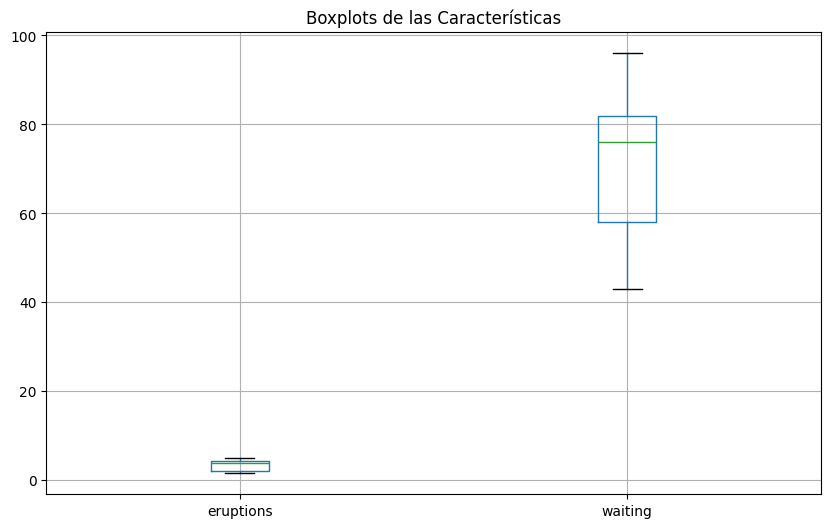

In [ ]:
# Crear boxplots para cada columna numérica
plt.figure(figsize=(10, 6))
df.boxplot(column=['eruptions', 'waiting'])
plt.title("Boxplots de las Características")
plt.show()

Para tener más claro como están distribuidos los valores de los sensores vamos a crear un histograma para cada uno de ellos. Un histograma es una representación gráfica de la distribución de un conjunto de datos. Muestra cómo se distribuyen los valores de una variable(en el eje X) y proporciona una visión rápida de la frecuencia con la que ocurren ciertos rangos de valores dentro del conjunto de datos(eje Y).

Podemos extraer las siguientes conclusiones:

Sería recomendable poner los datos en una misma escala porque las dos variables presentan escalas muy diferentes (eruptions con rango 0.220-0.260 vs S1 con 0.0-1.0).

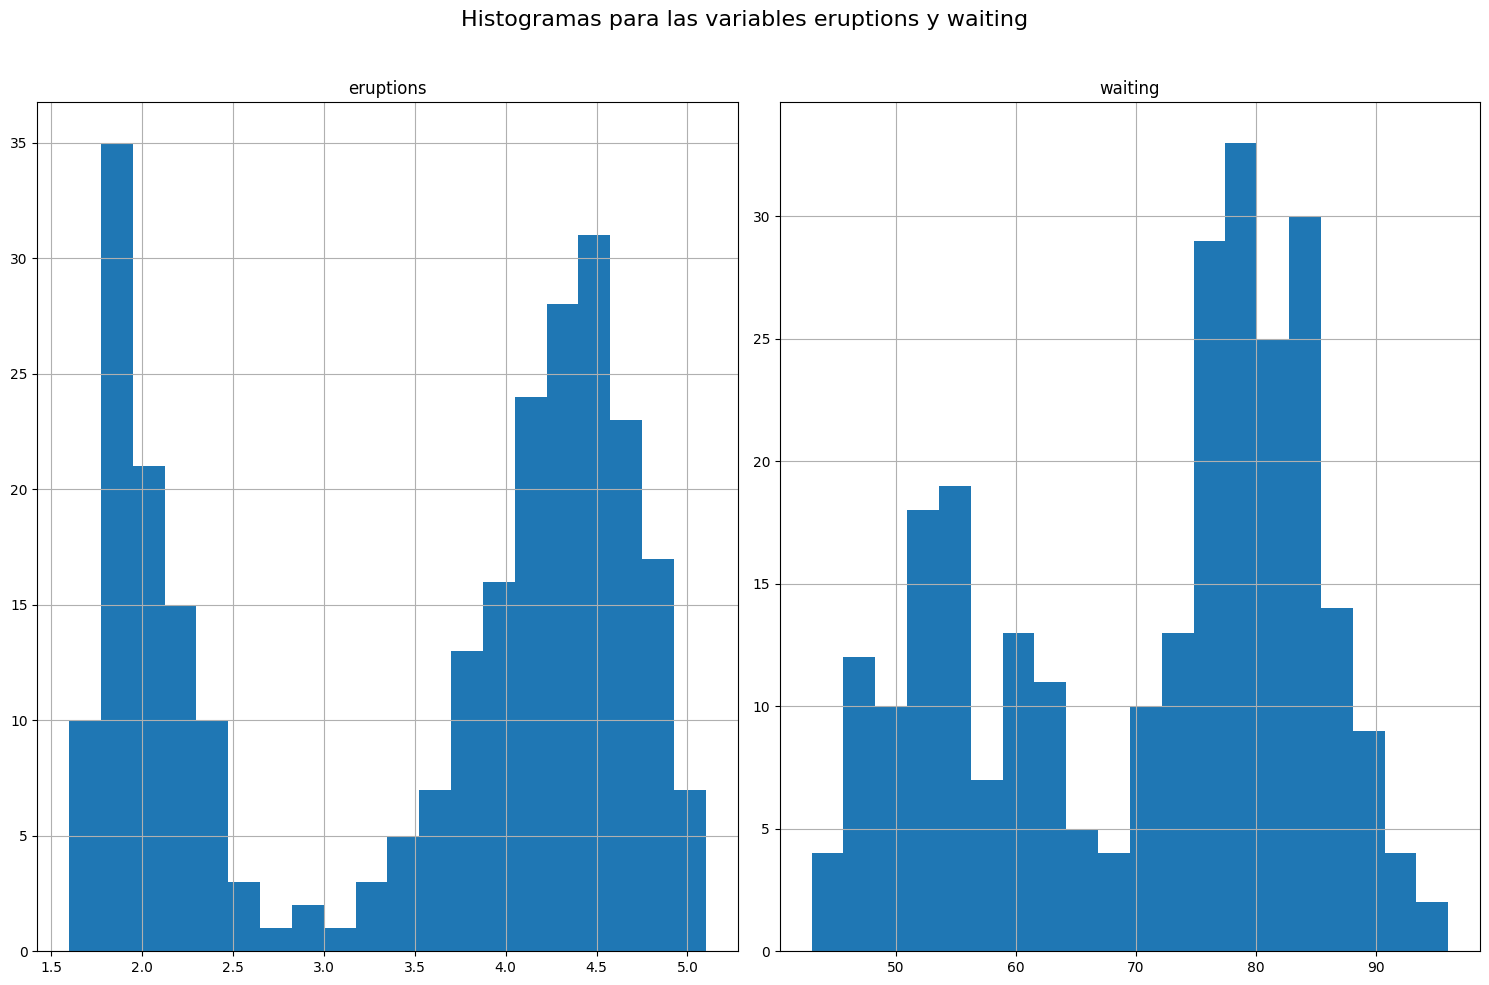

In [ ]:
df[['eruptions', 'waiting']].hist(bins=20, figsize=(15, 10))
plt.suptitle('Histogramas para las variables eruptions y waiting', fontsize=16)
plt.tight_layout(rect=[0, 0, 1, 0.96])
plt.show()

## **2.Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.**

No lo vamos a hacer, ya que en Aprendizaje no Supervisado no hay etiquetas, luego no puedes validar los modelos con un conjunto test separado. Lo que tendremos que hacer será comprobar si los modelos han separado los datos en distintos clusters.

Aún así para este caso vamos a separar una pequeña parte para test para luego verificar con knn.

Como estamos ante un problema de clustering, vamos a usar las siguiente métricas:
* WCSS (Within Cluster Sum of Squares): Mide cómo de bien se
agrupan los elementos pertenecientes a un mismo cluster con respecto a su centroide.
Si tenemos $K$ centroides $\{c_i\}_{i=1}^K$, y el $i$-ésimo cluster tiene centroide $c_i$ con $n_i$ elementos del cluster $\{x_j^{(i)}\}_{j=1}^{n_i}$, entonces el WCSS se calcula como:
$WCSS= \sum_{i=1}^K\sum_{j=1}^{n_i} (d(x_j^{(i)}, c_i))^2$
Usando el algoritmo KMeans, se puede obtener desde el atributo .inertia_
* S-Score (coeficiente de silueta): Mide lo bien que cada patrón
encaja en su cluster asignado. Combina información sobre la cohesión
y la separación de los clusters(debe haber al menos dos). La **cohesión** se refiere a cómo de cercanos se encuentran los puntos de un cluster con respecto a los demás miembros del cluster mientras que la **separación** se refiere a cómo de lejos se encuentra un punto de los puntos de otros clusters.
El coeficiente de silueta proporciona un valor en el rango $[-1, 1]$, donde un valor próximo a 1 indica que el punto está bien agrupado, un valor próximo a 0 indica que hay solapamiento entre clusters, y un valor próximo a -1 sugiere que el punto está asignado a un cluster de forma incorrecta.
Para un patrón dado $i$, su coeficiente silueta se calcula como:
$S_{score}(i) = {{separation — cohesion}\over{max(separation, cohesion)}}$
El valor del coeficiente global de todo el conjunto de datos se calcula como la media aritmética de todos los coeficientes individuales. Si el dataset contiene $N$ elementos $\{x_i\}_{i=1}^L$, entonces:
$S_{score}= {1\over N}\sum_{i=1}^N S_{score}(i)$

In [ ]:
from sklearn.model_selection import train_test_split

#con random_state fijamos la semilla
Xtrain, Xtest= train_test_split(X, test_size= 0.15, random_state= 123)

Xtrain.shape, Xtest.shape

((231, 2), (41, 2))

In [ ]:
# Distancia a usar como métrica de similitud entre patrones
def euclidean(x, y):
  return np.sqrt( np.sum( (x-y)**2, axis=-1) )

# Cálculo de la métrica Within-Cluster Sum of Squares (WCSS).
def WCSS(X, clusters, centroides):

  wcss= 0
  for i in range(len(centroides)):
    centroid_i= centroides[i, :].squeeze()
    elementos_cluster= X[clusters==i, :].squeeze()

    distancias_sqr= euclidean(elementos_cluster, centroid_i)**2
    wcss+= np.sum(distancias_sqr)
  return wcss

In [ ]:
from sklearn.metrics import silhouette_score

## **3.Preprocesado de datos**

Ya hemos visto que no tenemos datos atípicos y no vamos a realizar reducción de la dimensionalidad con PCA, ya que tenemos solo dos características. Si tuviesemos varias características hay que tener en cuenta que en espacios de muy alta dimensión, las distancias euclidianas tienden a inflarse por lo que reducir la dimensionalidad con PCA puede mejorar los cálculos. Lo que si es importante es poner los datos todos con la misma escala ya que en el análisis del problema hemos visto que los dos atributos tienen distintas escalas y queremos agrupar los datos en clusters, luego conviene que todos los datos esten todos en la misma escala.

In [ ]:
from sklearn.preprocessing import MinMaxScaler

print(Xtrain.shape)
mme= MinMaxScaler(feature_range=(0,1))
mme.fit(Xtrain)
Xtrain_std= mme.transform(Xtrain)
print('Los valores originales del training\n{}\nse han escalado:\n{}'.format(Xtrain, Xtrain_std))

Xtest_std = mme.transform(Xtest)

(231, 2)
Los valores originales del training
[[ 4.083 93.   ]
 [ 4.5   79.   ]
 [ 1.75  47.   ]
 [ 4.3   72.   ]
 [ 1.817 46.   ]
 [ 3.917 71.   ]
 [ 1.967 56.   ]
 [ 4.933 88.   ]
 [ 4.533 82.   ]
 [ 4.1   70.   ]
 [ 2.2   54.   ]
 [ 1.867 48.   ]
 [ 1.883 54.   ]
 [ 4.5   84.   ]
 [ 3.85  78.   ]
 [ 4.283 77.   ]
 [ 4.5   73.   ]
 [ 2.883 55.   ]
 [ 4.033 80.   ]
 [ 4.833 80.   ]
 [ 4.267 78.   ]
 [ 4.617 93.   ]
 [ 4.583 76.   ]
 [ 2.35  47.   ]
 [ 4.533 85.   ]
 [ 4.15  88.   ]
 [ 3.966 77.   ]
 [ 4.6   78.   ]
 [ 4.75  75.   ]
 [ 2.2   60.   ]
 [ 4.45  83.   ]
 [ 4.9   89.   ]
 [ 3.067 69.   ]
 [ 5.1   96.   ]
 [ 3.767 81.   ]
 [ 4.333 90.   ]
 [ 2.483 62.   ]
 [ 1.833 54.   ]
 [ 4.8   94.   ]
 [ 1.967 55.   ]
 [ 3.917 84.   ]
 [ 4.933 86.   ]
 [ 1.75  48.   ]
 [ 4.333 82.   ]
 [ 2.    56.   ]
 [ 1.733 54.   ]
 [ 4.183 86.   ]
 [ 2.233 60.   ]
 [ 2.017 52.   ]
 [ 2.25  60.   ]
 [ 4.7   80.   ]
 [ 5.033 77.   ]
 [ 4.417 83.   ]
 [ 4.583 85.   ]
 [ 4.8   75.   ]
 [ 4.15  76.   ]
 [ 

## **4. Selección de dos algoritmos de agrupamiento: KMeans y DBSCAN**

Vamos a usar los siguientes dos modelos:
* KMeans: Es un algoritmo basado en centroides. Se dispone de
una “plantilla” (centroide) para un total de k clusters (k hiperparámetro),
que se van ajustando iterativamente. Tiene fundamentalmente dos pasos en cada iteración:

1. **Agrupamiento**: Cálculo del cluster para cada elemento.
2. **Optimización de centroides**: Cálculo de nuevos centroides según el agrupamiento realizado.

Este algoritmo requiere que se especifique el número de clusters. Se adapta bien a un gran número de muestras y se ha utilizado en una amplia gama de áreas de aplicación en muchos campos diferentes. El objetivo del algoritmo K-means es elegir los centroides que minimicen la inercia, o el criterio de suma de cuadrados dentro del clúster:
\begin{equation}
{\sum_{i=0}^{n} min_{u_j\in C}(||x_i-u_j||^2)}
\end{equation}
donde $u_j$ es la media de las muestras en el cluster C

* DBSCAN(Density-Based Spatial Clustering of Applications with Noise): Busca muestras centrales de alta densidad y amplía los clusters a partir de ellas. Bueno para datos que contienen clusters de densidad similar.
Esta implementación tiene una complejidad de memoria en el peor de los casos de
$O(n^2)$, lo que puede ocurrir cuando el parámetro eps(distancia máxima entre dos muestras para que una se considere vecina de la otra) es grande y min_samples(el número de muestras en un vecindario para que un punto se considere un punto central, esto incluye el propio punto) es bajo, mientras que el DBSCAN original sólo utiliza memoria lineal.
El algoritmo DBSCAN considera los clusters como áreas de alta densidad separadas por áreas de baja densidad. Debido a esta visión más bien genérica, los clusters encontrados por DBSCAN pueden tener cualquier forma, a diferencia de k-means, que asume que los clusters tienen forma convexa. Importante tener en cuenta que este algoritmo detecta y separa los puntos que no pertenecen a ningún cluster. A estos puntos los marca con la etiqueta -1, lo que significa outliers o ruido.

WCSS (calculado manualmente): 1.5246945099675384
Silhouette Score: 0.368300876424651


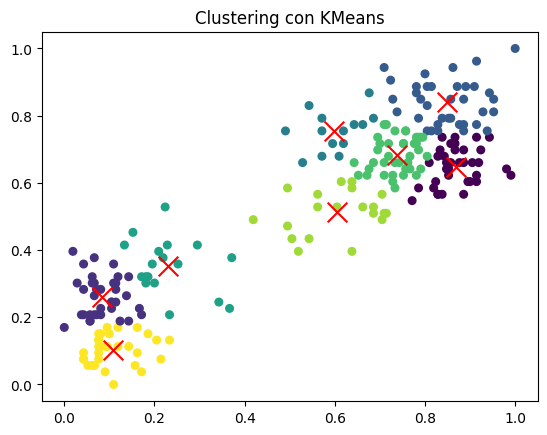

In [ ]:
from sklearn.cluster import KMeans

#KMeans
kmeans_model = KMeans() #Por defecto con n_clusters=8
kmeans_model.fit(Xtrain_std)
clusters = kmeans_model.predict(Xtrain_std)
centroides = kmeans_model.cluster_centers_

#métricas
wcss = WCSS(Xtrain_std, clusters, centroides)
sil_score = silhouette_score(Xtrain_std, clusters)

print("WCSS (calculado manualmente):", wcss)
print("Silhouette Score:", sil_score)

plt.scatter(Xtrain_std[:, 0], Xtrain_std[:, 1], c=clusters, cmap='viridis', s=30)
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', marker='x', s=200)
plt.title("Clustering con KMeans")
plt.show()

La clase que implementa al algoritmo DBSCAN no tiene un método predict(), aunque sí tiene un método fit_predict(). En otras palabras, no puede predecir a qué cluster pertenece una nueva instancia.

Se puede usar un clasificador para ver en qué cluster está cada punto nuevo. Vamos a usar un clasificador kNN sobre los  $k$=10  vecinos más cercanos, utilizando como ejemplos de entrenamiento los core points encontrados y como etiquetas (salidas deseadas) las labels_ obtenidas.

La clasificación se calcula a partir de una votación por mayoría simple de los vecinos más próximos de cada punto: a un punto de consulta se le asigna la clase de datos que tiene más representantes entre los vecinos más próximos del punto.

KNeighborsClassifier implementa el aprendizaje basado en los $k$
vecinos más cercanos de cada punto de consulta, donde $k$
es un valor entero especificado por el usuario.

Recordemos que:
* Los core points son puntos que están en el interior de un cluster. Para que un punto se considere core point tiene que tener un número de vecinos igual o mayor al especificado por el atributo min_samples.
* El atributo labels_ es el resultado de la asignación de cada punto a un cluster. La lista de labels_ contiene un valor para cada punto que indica a qué cluster pertenece, o si el punto es considerado ruido(en ese caso se etiqueta con -1).

Labels (Clusters): [ 0  0  1  0  1  0  1  0  0  0  1  1  1  0  0  0  0 -1  0  0  0  0  0  1
  0  0  0  0  0  1  0  0  0  0  0  0  1  1  0  1  0  0  1  0  1  1  0  1
  1  1  0  0  0  0  0  0  0  0  0  1  0  0  1  0  0  1  1  1  1  0  1  0
  1  0  1  1  0  0  0  1  0  1  0  1  0 -1  0  1  1  0  0  0  0  1  0  0
  0  0  0  1  0  1  1  1  0  0  0  0 -1 -1  0  1  0  0  1  1  0  1  0  1
  0  1  1  0  0  0  0  0  0  0  0  0  0  0  1  1  0  0  1  0  1  1  0  0
  0  0  1  1  0  0  0  0  0  0  0  0  1  0  0  0  0  1  0  0  0  0  1  1
  0  1  0  1  0  1  0  1  0  1  0  0  0  1  1  0  0  1  1  0  0  1  1  1
  0  0  1  0  0  1  0  1  0  0  0  0  0  0  1  1  1  1  0  0  1  0  1  0
  0  0  1  1  0  0  0  0  1  1  0  1  0  0  1]
Silhouette Score: 0.5542704830289488
WCSS: 5.41696111422433


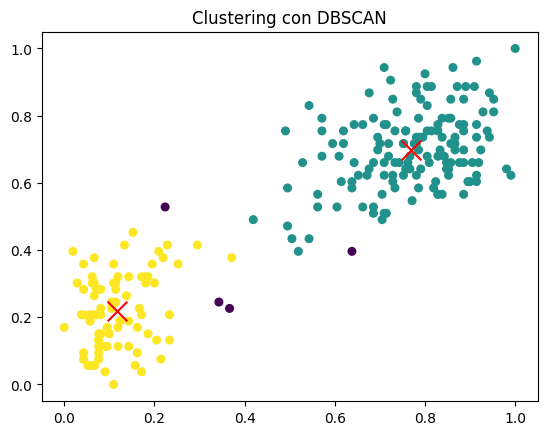

In [ ]:
from sklearn.cluster import DBSCAN
from sklearn.neighbors import KNeighborsClassifier

dbscan = DBSCAN(eps=0.1) #Por defecto, eps=0.5, min_samples=5
labels = dbscan.fit_predict(Xtrain_std)

# Core points
core_samples_mask = np.zeros_like(labels, dtype=bool) #Crea un array de falses de tamaño igual al array labels
#Lo ponemos a true en las posicones correspondientes a los indices de los core points
#db.core_sample_indices_ es un atributo de DBSCAN que contiene los índices de los puntos que son considerados core points
core_samples_mask[dbscan.core_sample_indices_] = True

#Nos quedamos con los puntos que son core points
X_core = Xtrain_std[core_samples_mask]
#Nos quedamos con las teiquetas de cluster de cada core point
y_core = labels[core_samples_mask]

# Clasificador kNN con k=10
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_core, y_core)
#predicciones = knn.predict()


#Silhouette Score
sil_score = silhouette_score(Xtrain_std, labels)

# WCSS (Within-Cluster Sum of Squares)
centroides = np.array([Xtrain_std[labels == i].mean(axis=0) for i in np.unique(labels) if i != -1])  # Excluimos ruido (-1)
wcss_value = WCSS(Xtrain_std, labels, centroides)

# Imprimir resultados
print(f"Labels (Clusters): {labels}")
print(f"Silhouette Score: {sil_score}")
print(f"WCSS: {wcss_value}")


plt.scatter(Xtrain_std[:, 0], Xtrain_std[:, 1], c=labels, cmap='viridis', s=30)
plt.scatter(centroides[:, 0], centroides[:, 1], c='red', marker='x', s=200)
plt.title("Clustering con DBSCAN")
plt.show()

## **5. Selección y estimación de valores para hiperparámetros**

En esta parte vamos a encontrar los mejores valores para los parámetros que controlan el comportamiento de KMeans y DBSCAN.

1. KMeans: Vamos a optimizar n_clusters, que indica el número de clusters a formar así como el número de centroides a generar. Para ello vamos a usar el **método del codo**, que consiste en entrenar el modelo de KMeans para diferentes valores de n_clusters y se observa la inercia o WCSS (Within-Cluster Sum of Squares). El valor de k donde la disminución en la inercia comienza a ser más suave (como un "codo") suele ser la elección óptima. También vamos a usar el **método de la Silueta**, los valores cercanos a 1 indican que los puntos están bien agrupados, aunque a veces eso va a consta de quedarnos con muy poco clusters, asi que no hay que tomarselo al pie de la letra, si no como una indicación.

2. DBSCAN: Vamos a optimizar:
  * eps: Distancia máxima entre dos muestras para que una se considere vecina de la otra. No se trata de un límite máximo para las distancias de los puntos de un conglomerado.
  * min_samples: int, default=5,
el número de muestras (o peso total) en un vecindario para que un punto se considere un punto central. Esto incluye el punto en sí. Si min_muestras se fija en un valor más alto, DBSCAN encontrará conglomerados más densos, mientras que si se fija en un valor más bajo, los conglomerados encontrados serán más dispersos.

In [ ]:
# Diccionario para guardar los centroides de todas las pruebas
centroides_totales= {}

wcss= [] # Listado de WCSS para cada solución
Sscore= [] # Listado de Silhouette Scores para cada solución


# Generamos soluciones desde 2 a max_clusters clusters
max_clusters= 10
for num_clusters in range(2, max_clusters+1):

  # Calculamos solución para num_clusters clusters
  kmeans_model = KMeans(n_clusters=num_clusters)
  kmeans_model.fit(Xtrain_std)
  clusters = kmeans_model.predict(Xtrain_std)
  centroides = kmeans_model.cluster_centers_

  # Calculamos el WCSS de la solución
  wcss.append( WCSS(Xtrain_std, clusters, centroides) )

  # Cálculo de la S-Score
  Sscore.append( silhouette_score(Xtrain_std, clusters) )

  # Guardamos solución
  centroides_totales[num_clusters]= centroides

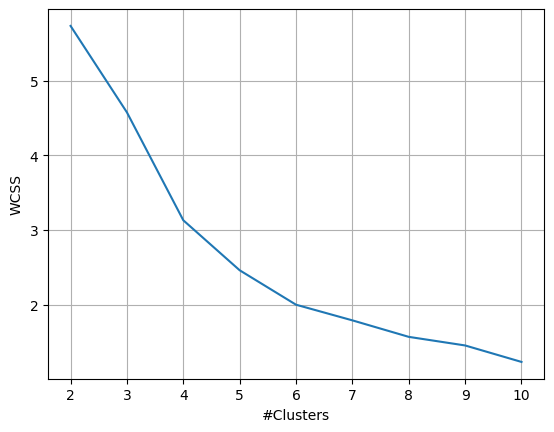

In [ ]:
plt.plot(np.arange(2, max_clusters+1), wcss)
plt.xlabel('#Clusters')
plt.ylabel('WCSS')
plt.grid()
plt.show()

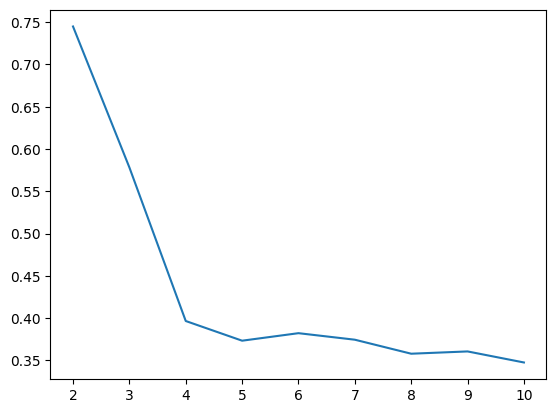

In [ ]:
plt.plot( np.arange(2, max_clusters+1), Sscore )

La primera gráfica, usando el método del codo nos indica que el nuḿero mejor de clusters es 6, y el método de la silueta nos indica que el mayor valor se obtiene con un nuḿero de clusters=2, así que vamos a fijarnos en las métricas para ver con que número de clusters nos quedamos.

In [ ]:
wcss, Sscore

([np.float64(5.732946545685984),
  np.float64(4.574263677220618),
  np.float64(3.1286424774897714),
  np.float64(2.458748140242812),
  np.float64(1.9971950552267461),
  np.float64(1.7874035401427264),
  np.float64(1.5663922059784363),
  np.float64(1.4512153778889314),
  np.float64(1.2305664788359858)],
 [np.float64(0.7449574543599454),
  np.float64(0.5782707282742879),
  np.float64(0.39665388981729865),
  np.float64(0.37337773957840903),
  np.float64(0.3822637585496708),
  np.float64(0.374544092104968),
  np.float64(0.35797906986242456),
  np.float64(0.36068069330846003),
  np.float64(0.3476153828809889)])

Podemos ver lo siguiente:
* WCSS: Disminuye conforme aumentan los clusters (esperado).
Diferencias:
    1. f(n_clusters=2)-(n_clusters=3): 5.73295-3.9533=1.77965
    2. f(n_clusters=3)-(n_clusters=4): 3.9533-3.4109=0.5424
    3. f(n_clusters=4)-(n_clusters=5): 3.4109-2.4587=0.9522
    4. f(n_clusters=5)-(n_clusters=6): 2.4587-1.9911=0.4676
    5. f(n_clusters=6)-(n_clusters=7): 1.9911-1.85169=0.13941

Las mejoras después de n_clusters=5 ya son menores.

* Silhouette Score:
Mayor valor: n_clusters=2 (0.745), pero es normal que n_clusters=2 tenga un score alto.

Baja bastante en n_clusters=3 (0.43) y sigue bajando aunque de manera más uniforme.

Viendo estas dos métricas nos vamos a quedar con n_clusters = 3, que tiene un buen balance entre reducción de WCSS y aún aceptable silhouette.

In [ ]:
eps_values = np.arange(0.1, 1.5, 0.1)
min_samples_values = range(3, 10)

best_score = -1
best_params = None
resultados = []

for eps in eps_values:
    for min_samples in min_samples_values:
        db = DBSCAN(eps=eps, min_samples=min_samples)
        labels = db.fit_predict(Xtrain_std)

        # Evaluamos solo si hay al menos 2 clusters (sin contar ruido)
        n_clusters = len(set(labels)) - (1 if -1 in labels else 0)
        if n_clusters > 1:
            score = silhouette_score(Xtrain_std, labels)
            resultados.append((eps, min_samples, score, n_clusters))
            if score > best_score:
                best_score = score
                best_params = (eps, min_samples)

print(f"\n Mejor configuración:")
print(f"eps = {best_params[0]}, min_samples = {best_params[1]}")
print(f"Silhouette Score = {best_score:.4f}")



 Mejor configuración:
eps = 0.1, min_samples = 8
Silhouette Score = 0.5785


## **6. Entrenamiento y estimación del error fuera de la muestra. Discusión de resultados y extracción de conclusiones**

Una vez que hemos seleccionado los hiperparámetros, vamos a entrenar el modelo definitivo y evaluar su rendimiento en los datos que hemos separado para el test. En el caso del algoritmo DBSCAN, como no disponemos de método predict, vamos a usar el clasificador kNN sobre los  k=10  vecinos más cercanos.

WCSS: 0.43132193337189867
Silhouette Score: 0.504148351533633


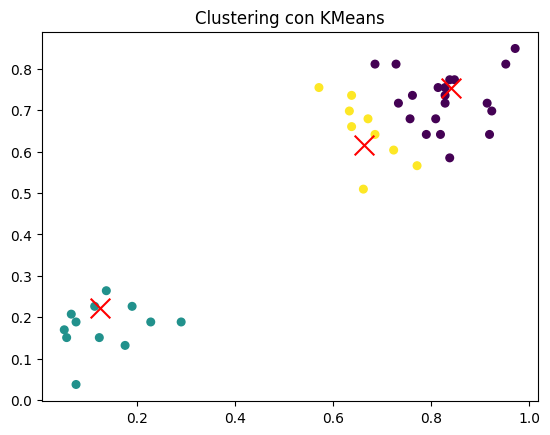

In [ ]:
#KMeans
best_kmeans_model = KMeans(n_clusters=3)
best_kmeans_model.fit(Xtrain_std)

# Evaluación en conjunto de prueba
clusters_test = best_kmeans_model.predict(Xtest_std)

centroides_test = best_kmeans_model.cluster_centers_

#métricas
wcss = WCSS(Xtest_std, clusters_test, centroides_test)
sil_score = silhouette_score(Xtest_std, clusters_test)

print("WCSS:", wcss)
print("Silhouette Score:", sil_score)

plt.scatter(Xtest_std[:, 0], Xtest_std[:, 1], c=clusters_test, cmap='viridis', s=30)
plt.scatter(centroides_test[:, 0], centroides_test[:, 1], c='red', marker='x', s=200)
plt.title("Clustering con KMeans")
plt.show()

Labels (Clusters): [0 1 1 0 1 0 0 0 0 1 1 1 0 1 0 0 0 0 0 0 1 1 0 0 1 0 0 0 0 0 0 1 0 1 0 0 0
 0 0 0 0]
Silhouette Score: 0.814773236403616
WCSS: 0.5805144964413086


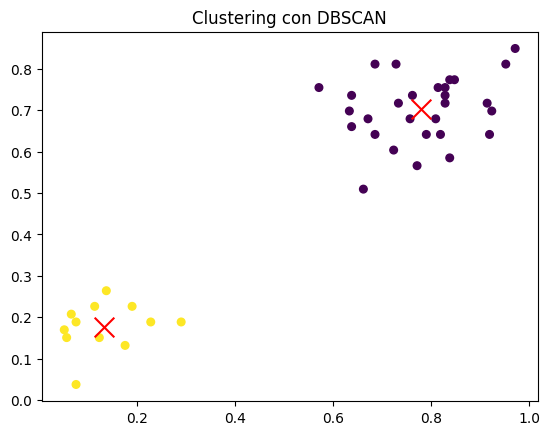

In [ ]:
best_dbscan = DBSCAN(eps = 0.1, min_samples = 8)
labels = best_dbscan.fit_predict(Xtrain_std)

# Core points
core_samples_mask = np.zeros_like(labels, dtype=bool) #Crea un array de falses de tamaño igual al array labels
#Lo ponemos a true en las posicones correspondientes a los indices de los core points
#db.core_sample_indices_ es un atributo de DBSCAN que contiene los índices de los puntos que son considerados core points
core_samples_mask[best_dbscan.core_sample_indices_] = True

#Nos quedamos con los puntos que son core points
X_core = Xtrain_std[core_samples_mask]
#Nos quedamos con las teiquetas de cluster de cada core point
y_core = labels[core_samples_mask]

# Clasificador kNN con k=10
knn = KNeighborsClassifier(n_neighbors=10)
knn.fit(X_core, y_core)
clusters_test = knn.predict(Xtest_std)


#Silhouette Score
sil_score = silhouette_score(Xtest_std, clusters_test)

# WCSS (Within-Cluster Sum of Squares)
centroides_test = np.array([Xtest_std[clusters_test == i].mean(axis=0) for i in np.unique(clusters_test) if i != -1])  # Excluimos ruido (-1)
wcss_value = WCSS(Xtest_std, clusters_test, centroides_test)

# Imprimir resultados
print(f"Labels (Clusters): {clusters_test}")
print(f"Silhouette Score: {sil_score}")
print(f"WCSS: {wcss_value}")


plt.scatter(Xtest_std[:, 0], Xtest_std[:, 1], c=clusters_test, cmap='viridis', s=30)
plt.scatter(centroides_test[:, 0], centroides_test[:, 1], c='red', marker='x', s=200)
plt.title("Clustering con DBSCAN")
plt.show()

Discusión de resultados y extracción de conclusiones

---

En este problema de Aprendizaje No Supervisado, había que identificar cuántas categorías de erupciones existen dado un dataset de un geiser en el que se davan dos atributos, el tiempo que transcurre entre dos erupciones consecutivas, medido en minutos y la duración de una erupción (en minutos).

Hemos usado dos modelos de clustering, KMeans y DBSCAN discutidos durante el ejercicio y hemos obtenido los siguientes resultados acerca de cuántas categorías de erupciones existen, partiendo de los datos proporcionados por las mediciones proporcionadas:

* Con KMeans ajustando el hiperparámetro n_clusters hemos obtenido que el valor que obtiene unas mejores métricas es 3. Realizando la comprobación sobre el conjunto de test vemos que funciona bastante bien:
  1. WCSS: 0.424404574252627
  2. Silhouette Score: 0.504148351533633

Con un número de clusters igual a 2 obtenemos un mejor valor de silueta,( lo que es lógico, al haber menos clusters es más fácil que cada patron encaje en su cluster asignado) pero en detrimento de la métrica WCSS.

* Con DBSCAN ajustando los hiperparámetros eps = 0.1, min_samples = 8 y realizando la comprobación sobre el conjunto de test(usando el clasificador knn ya que DBSCAN no dispone de método predict) obtenemos buenos resultados en las métricas también:
  1. Silhouette Score: 0.814773236403616
  2. WCSS: 0.5805144964413086

Son valores similares a los que se obtendrían en KMeans con n_clusters=2.

Como conclusiones finales podemos extraer:
1. DBSCAN + kNN separa mejor los datos (valor alto de Silhouette)
2. KMeans es más compacto(valor más bajo de WCSS), aunque como ya sabemos KMEans asume que los clusters tienen forma convexa, luego esto no siempre implica una mejor estructura de clusters.
3. Por esto nos quedamos con que el número de categorias de erupciones obtenidos son 2, además que analizando la gráfica de los patrones se pueden ver dos clusters diferenciados.





# **Ejercicio 2: Minería de reglas de asociación (5 puntos)**

En este ejercicio los alumnos se enfrentarán a un problema de extracción de reglas de asociación, el cual tendrán que abordar de comienzo a fin (desde el análisis exploratorio hasta el entrenamiento y validación de los modelos de aprendizaje automático seleccionados). En particular, se enfrentarán a un problema real de uso de técnicas de aprendizaje automático para tratar de abstraer un conjunto de datos de modo que se puedan extraer reglas de asociación de tipo $X\rightarrow Y$ desde itemsets frecuentes.


## El conjunto de datos


El conjunto de datos contiene un subconjunto de ventas efectuadas en una panadería. Se organiza en 4 columnas:

- **Fecha** en la que se realizó la venta.
- **Hora** a la que se realizó la venta.
- **ID** de la transacción (ticket), anonimizado.
- **Producto** involucrado en la venta.

Los datos se corresponden con un subconjunto de los tickets generados por la panadería desde el 30 de Octubre de 2016 hasta el 9 de Mayo de 2017, incluyendo la venta de 21293 productos en un total de 9531 transacciones.

Los items de las transacciones pueden contener valores que no se corresponden con productos vendidos. En particular, ```'Adjustement'``` puede significar un ajuste en la caja registradora (por ejemplo por devolución de artículos), ```'NONE'``` se utiliza para nombrar valores perdidos, y ```'Afternoon with the baker'``` podría ser alguna venta realizada directamente por la obradora de pan, recogidas o elementos impagados previamente, etc., aunque se desconoce qué producto concreto podría haberse vendido o cuándo se realizó la recogida exactamente.

La siguiente celda de código muestra cómo leer el conjunto de datos en el cuaderno:

In [ ]:
import pandas as pd

URL= "https://www.dropbox.com/scl/fi/ntzlc1hmdjfj0tk74m605/AssociationRules.csv?rlkey=4pf4fvdzcqxq2dc6rtbwfqd73&st=ma0tu437&dl=1"
df2= pd.read_csv(URL)
df2

,Date,Time,Transaction,Item
0,2016-10-30,09:58:11,1,Bread
1,2016-10-30,10:05:34,2,Scandinavian
2,2016-10-30,10:05:34,2,Scandinavian
3,2016-10-30,10:07:57,3,Hot chocolate
4,2016-10-30,10:07:57,3,Jam
...,...,...,...,...
21288,2017-04-09,14:32:58,9682,Coffee
21289,2017-04-09,14:32:58,9682,Tea
21290,2017-04-09,14:57:06,9683,Coffee
21291,2017-04-09,14:57:06,9683,Pastry


## Tarea


El alumnado debe realizar, al menos, las siguientes tareas (que deben ser descritas y abordadas, explícitamente, en la documentación entregada; de hecho, se debe incluir un subapartado en el Notebook para cada una de ellas):

1. Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición.
2. Preprocesado de datos (selección/extracción de características, reducción de dimensionalidad, procesado de datos extremos/atípicos, imputación de datos faltantes, escalado de variables, codificación/transformación de datos, desbalanceo de datos).
3. Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.
4. Selección de dos algoritmos de extracción de itemsets frecuentes.
5. Selección y estimación de valores para hiperparámetros.
6. Entrenamiento y estimación del error fuera de la muestra. Discusión de resultados y extracción de conclusiones. **Se deberá incluir un estudio del tiempo de ejecución de los algoritmos seleccionados para extracción de itemsets frecuentes**. Se puede utilizar el comando reservado ```%timeit instrucción** para hacer un estudio del tiempo que tarda la instrucción en ejecutarse. **CUIDADO: Si la instrucción muestra algo por consola, la ejecución de múltiples instancias de la ejecución de la función puede colapsar la celda de resultado.**

Un ejemplo de uso de ```%timeit``` se encuentra en la siguiente celda de código:



In [ ]:
import numpy as np

%timeit np.zeros(1000)

659 ns ± 169 ns per loop (mean ± std. dev. of 7 runs, 1000000 loops each)


## **1. Análisis descriptivo del problema y análisis exploratorio de los datos a nuestra disposición**

Se trata de un problema de Aprendizaje No Supervisado. En este caso nos enfrentamos a un problema de extracción de reglas de asociación. Se tratar de abstraer un conjunto de datos de modo que se puedan extraer reglas de asociación de tipo  𝑋→𝑌  desde itemsets frecuentes.

Para realizarlo, disponemos de un dataset que contiene ventas efectuadas en una panadería. Se organiza en 4 columnas:

1. Fecha en la que se realizó la venta.
2. Hora a la que se realizó la venta.
3. ID de la transacción (ticket), anonimizado.
4. Producto involucrado en la venta.

Vamos a recordar la nomenclatura que se usa en estos problemas:
* Transacciones: patrones de entrada.
* Base de Datos Transaccional: conjunto patrones de entrada (dataset).
* Items: elementos individuales/atómicos de las transacciones (por
ejemplo, los productos de una lista de la compra)
* Itemsets: conjuntos de items que guardan relación entre sí dentro de
una transacción (por ejemplo, un subconjunto de los productos de
una lista de la compra).
* Itemsets frecuentes: conjuntos de items que suelen aparecer juntos
en varias transacciones.

Hay que mencionar que vamos a usar la  biblioteca mlxtend (machine learning extensions) contiene utilidades varias para realizar operaciones rutinarias en aprendizaje automático y en ciencia de datos. Entre otras cosas permite extraer reglas de asociación con diversos algoritmos para resolver sus dos problemas fundamentaless:
* Identificación de itemsets frecuentes.
* Identificación de reglas de asociación de interés.

Lo primero que vamos a hacer es instalarla.

In [ ]:
!pip install mlxtend

Además vamos a comprobar si hay datos nulos, ya que de haberlos es importante quitarlos o sustituirlos por otros valores aproximados. Un valor perdido es un valor desconocido dentro de una celda en nuestro conjunto de datos y en NumPy se suelen representar mediante el valor np.nan. Existen varias técnicas de tratamiento de valores perdidos pero en este dataset podemos comprobar que no hay valores nulos.

Es importante recalcar que al tratarse de un problema de Aprendizaje no supervisado, no tenemos variable objetivo, sino que tenemos que buscar asociaciones usando todos los atributos que dispongamos.

In [ ]:
data= df2.to_numpy()

X_analisis= data[:, :]

print('Conjunto de datos con {} patrones y {} atributos.\n'.format(X_analisis.shape[0], X_analisis.shape[1]))

#Comprobamos si hay valores nulos. Dos opciones
print('El numero de valores nulos es: \n{}\n'.format(df2.isnull().sum()))
print(df2.info())

Conjunto de datos con 21293 patrones y 4 atributos.

El numero de valores nulos es: 
Date           0
Time           0
Transaction    0
Item           0
dtype: int64

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 21293 entries, 0 to 21292
Data columns (total 4 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   Date         21293 non-null  object
 1   Time         21293 non-null  object
 2   Transaction  21293 non-null  int64 
 3   Item         21293 non-null  object
dtypes: int64(1), object(3)
memory usage: 665.5+ KB
None


No vamos a realizar un procesado de datos atípicos ya que en modelos de búsqueda de en reglas de asociación, lo que importa es la frecuencia de los ítems, no sus valores numéricos.

## **2.Definición del protocolo de validación experimental (entrenamiento, validación y test), junto con las métricas de evaluación del rendimiento que corresponda.**

No lo vamos a hacer, ya que en Aprendizaje no Supervisado no hay etiquetas, luego no puedes validar los modelos con un conjunto test separado. Además que si dejamos una parte del dataset para el test estariámos peridendo información a la hora de extraer reglas de asociación. Para avaluar los modelos disponemos de una serie de métricas.

Como estamos ante un problema de asociación, vamos a usar las siguientes evaluar itemsets y reglas de asociación:
* Soporte de un itemset. Es la proporción del número de patrones
(transacciones) que contienen al itemset frente al total de
transacciones de la Base de Datos. Se encuentra en el rango [0, 1]. Se
corresponde con la probabilidad $p(itemset)$.
* Confianza de una regla (a→c). Es la proporción en la que el
itemset (a, c) aparece entre las transacciones donde aparece el
itemset (a). Se encuentra en el rango [0, 1]. Se corresponde con la
probabilidad $p(c|a)$.
* Lift de una regla (a→c). Describe la confianza que tenemos de que
se dé el consecuente cuando se cumple el antecedente. Por ejemplo,
en la regla (Carne) → (Pimienta), indica cómo de seguros estamos de
que el cliente compre pimienta una vez que ha comprado carne. Se
corresponde con el cálculo:
\begin{equation}
\frac{confianza(a → c)}{Soporte(c)}
\end{equation}
Valores superiores a 1 indican que podríamos tener una confianza Lift
aceptable.
* Leverage de una regla (a→c). Describe la correlación existente
entre itemsets, comparando el soporte de ambos suponiendo
independencia. Se calcula como:
\begin{equation}
Soporte((a, c))-Soporte(a)·Soporte(c)
\end{equation}
  1. Valores próximos a 0 indican independencia entre el antecedente y el
consecuente.
  2. Valores positivos indican correlación positiva.
  3. Valores negativos indican correlación negativa.

## **3.Preprocesado de datos**

En un problema de este tipo, la extracción de reglas de asociación se lleva a cabo sobre Bases de Datos Transaccionales. Por lo que debemos codificar nuestros datos, para ello vamos a usar la clase TransactionEncoder que proporciona la biblioteca mlxtend.

Para ello tenemos que tener en cuenta que las columnas Date y Time no van a ser necesarias, asi que no la vamos a tener en cuenta. Además, tenemos que agrupar todos los productos que se vendieron juntos en una misma transacción antes de usar TransactionEncoder.

Además nos dicen que los items de las transacciones pueden contener valores que no se corresponden con productos vendidos. En particular, 'Adjustement' puede significar un ajuste en la caja registradora (por ejemplo por devolución de artículos), 'NONE' se utiliza para nombrar valores perdidos, y 'Afternoon with the baker' podría ser alguna venta realizada directamente por la obradora de pan, recogidas o elementos impagados previamente, etc.

Así que antes de agrupar los items por transacciones vamos a eliminar estos valores para que las reglas de asociación se centren solo en productos vendidos.

No vamos a realizar reducción de la dimensionalidad con PCA, ya que es un problema de asociación luego estariámos perdiendo información.

In [ ]:
from mlxtend.preprocessing import TransactionEncoder

items_a_eliminar = ['Adjustment', 'NONE', 'Afternoon with the baker']

#Con isin creamos una lista de tamaño el del item donde se pone a true si esta unos de los valores
#de items_a_eliminar y si no a false, el simbolo ~ es para hacer la negación y el resultado
#se lo pasamos como mascara boolena a df2
df2_filtrado = df2[~df2['Item'].isin(items_a_eliminar)]

X2 = df2_filtrado.groupby('Transaction')['Item'].apply(list)

print('Listado inicial de transacciones:')
print(X2)

print('\nTras la transformación con TransactionEncoder:')
te = TransactionEncoder()
dataset = te.fit(X2).transform(X2).astype(int)
print(dataset)

print('Podemos pasar el dataset a un Dataframe:')
df_codificado= pd.DataFrame(dataset, columns=te.columns_).astype(bool)
df_codificado.head(len(X2))

Listado inicial de transacciones:
Transaction
1                                                 [Bread]
2                            [Scandinavian, Scandinavian]
3                           [Hot chocolate, Jam, Cookies]
4                                                [Muffin]
5                                 [Coffee, Pastry, Bread]
                              ...                        
9680                                              [Bread]
9681    [Truffles, Tea, Spanish Brunch, Christmas common]
9682                  [Muffin, Tacos/Fajita, Coffee, Tea]
9683                                     [Coffee, Pastry]
9684                                          [Smoothies]
Name: Item, Length: 9433, dtype: object

Tras la transformación con TransactionEncoder:
[[0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 ...
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 0]]
Podemos pasar el dataset a un Dataframe:


,Alfajores,Argentina Night,Art Tray,Bacon,Baguette,Bakewell,Bare Popcorn,Basket,Bowl Nic Pitt,Bread,...,The BART,The Nomad,Tiffin,Toast,Truffles,Tshirt,Valentine's card,Vegan Feast,Vegan mincepie,Victorian Sponge
0,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
9428,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
9429,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,True,False,False,False,False,False
9430,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
9431,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


## **4. Selección de dos algoritmos de extracción de itemsets frecuentes: APriori y FP-Growth**

Vamos a usar los siguientes dos modelos para extraer itemsets frecuentes:

1. APriori: es un método clásico de extracción de itemsets frecuentes.
Se basa en el uso de la métrica de soporte para construir iterativamente
itemsets más complejos partiendo de itemsets más simples. El algoritmo apriori se ha diseñado para operar en bases de datos que contienen transacciones, como las compras de los clientes de una tienda. Un conjunto de ítems se considera «frecuente» si cumple un umbral de soporte especificado por el usuario(el hiperparámetro min_support). Por ejemplo, si el umbral de soporte se fija en 0,5 (50%), un conjunto de elementos frecuentes se define como un conjunto de elementos que aparecen juntos en al menos el 50% de todas las transacciones de la base de datos. Importante: Cuanto más grande sea el dataset más pequeño deberá ser el soporte(en general).
$apriori(df, min\_support=0.5, use\_colnames=False, max\_len=None, verbose=0, low\_memory=False)$
  * df : pandas DataFrame, los valores permitdos son 0/1 o True/False.
  * min_support : float (default: 0.5)
  * use_colnames : bool (default: False), si es True usa los nombres de las columnas del DataFrame.
  * max_len : int (default: None), longitud máxima de los itemsets generados.
  * verbose : int (default: 0), muestra el número de iteraciones si low_memory es True y el número de iteraciones >=1. Si =1 y low_memory es False, muestra el número de combinaciones.
  * low_memory : bool (default: False), si es  True, usa un iterator para buscar las combinaciones por encima de min_support. Esto hace que sea más lento

Devuelve un pandas DataFrame con las columnas [“support”, “itemsets”] de todos los itemsets que son >= min_support y < que max_len (si max_len no es None).  Como desventaja es que es lento con datasets grandes, ya que realiza muchas iteraciones.

2. FP-Growth: Lo que lo diferencia del algoritmo de minería de patrones frecuentes Apriori, FP-Growth es un algoritmo de minería de patrones frecuentes que no requiere la generación de candidatos. Internamente, utiliza una estructura de datos denominada FP-tree (árbol de patrones frecuentes) sin generar explícitamente los conjuntos de candidatos, lo que lo hace especialmente atractivo para grandes conjuntos de datos. Como tenemos más de 9.000 filas y transacciones con pocos productos (panadería = ventas rápidas y pequeñas) va a funcionar mucho mejor que el modelo APriori. $fpgrowth(df, min\_support=0.5, use\_colnames=False, max\_len=None, verbose=0)$
  * df : pandas DataFrame, los valores permitdos son 0/1 o True/False.
  * min_support : float (default: 0.5)
  * use_colnames : bool (default: False), si es True usa los nombres de las columnas del DataFrame.
  * max_len : int (default: None), longitud máxima de los itemsets generados.
  * verbose : int (default: 0), muestra las etapas de la generación del árbol condicional.

En ambos casos, una vez extraído los itemsets frecuentes tenemos que llamar a **association_rules** de la misma librería para extraer las reglas de asociación. Esta función genera reglas de asociación a partir de conjuntos de elementos frecuentes. Una regla de asociación es una expresión de implicación de la forma X→Y
,donde X e Y
 son conjuntos de elementos disjuntos. Un ejemplo más concreto basado en el comportamiento de los consumidores sería ${Pañales}→{Cerveza}$
, que sugiere que las personas que compran pañales también suelen comprar cerveza. Para evaluar el «interés» de una regla de asociación de este tipo, se han desarrollado diferentes métricas. La implementación actual hace uso de las métricas de confidence y lift. Es importante el parámetro min_threshold que indica el mínimo valor de confidence(dado el itemset (a,c), es la $p(a|c)$) que quieres que tengan los itemsets frecuentes de los que queremos extraer reglas de asociación.

In [ ]:
from mlxtend.frequent_patterns import apriori

itemsets_apriori= apriori(df_codificado, min_support=0.01, use_colnames=True)
itemsets_apriori

,support,itemsets
0,0.036468,(Alfajores)
1,0.016114,(Baguette)
2,0.328315,(Bread)
3,0.040178,(Brownie)
4,0.104209,(Cake)
...,...,...
56,0.023746,"(Toast, Coffee)"
57,0.014417,"(Sandwich, Tea)"
58,0.010071,"(Cake, Bread, Coffee)"
59,0.011237,"(Bread, Pastry, Coffee)"


In [ ]:
#min_support = 0.01 significa que solo se consideran los conjuntos de ítems que aparecen en al menos el 1% de las transacciones.
from mlxtend.frequent_patterns import fpgrowth

itemsets_fp = fpgrowth(df_codificado, min_support=0.01, use_colnames=True)
itemsets_fp

,support,itemsets
0,0.328315,(Bread)
1,0.029153,(Scandinavian)
2,0.058518,(Hot chocolate)
3,0.054596,(Cookies)
4,0.015054,(Jam)
...,...,...
56,0.019718,"(Brownie, Coffee)"
57,0.010813,"(Bread, Brownie)"
58,0.023746,"(Toast, Coffee)"
59,0.018128,"(Scone, Coffee)"


In [ ]:
from mlxtend.frequent_patterns import association_rules

rules_apriori= association_rules(itemsets_apriori, len(itemsets_apriori), metric="confidence", min_threshold=0.5)
rules_apriori


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Alfajores),(Coffee),0.036468,0.480017,0.019718,0.540698,1.126414,1.0,0.002213,1.132115,0.116474,0.039693,0.116697,0.290888
1,(Cake),(Coffee),0.104209,0.480017,0.054914,0.526958,1.097791,1.0,0.004892,1.099233,0.099443,0.103745,0.090275,0.320679
2,(Cookies),(Coffee),0.054596,0.480017,0.028305,0.518447,1.080059,1.0,0.002098,1.079803,0.078405,0.055905,0.073906,0.288707
3,(Hot chocolate),(Coffee),0.058518,0.480017,0.029683,0.507246,1.056726,1.0,0.001593,1.055260,0.057017,0.058333,0.052366,0.284542
4,(Juice),(Coffee),0.038694,0.480017,0.020672,0.534247,1.112974,1.0,0.002098,1.116434,0.105593,0.041507,0.104291,0.288656
5,(Medialuna),(Coffee),0.062016,0.480017,0.035302,0.569231,1.185856,1.0,0.005533,1.207103,0.167089,0.069665,0.171571,0.321387
6,(Pastry),(Coffee),0.086399,0.480017,0.047705,0.552147,1.150266,1.0,0.006232,1.161058,0.142990,0.091968,0.138717,0.325764
7,(Sandwich),(Coffee),0.072087,0.480017,0.038376,0.532353,1.109029,1.0,0.003773,1.111913,0.105948,0.074701,0.100649,0.306150
8,(Scone),(Coffee),0.034666,0.480017,0.018128,0.522936,1.089411,1.0,0.001488,1.089964,0.085020,0.036507,0.082539,0.280350
9,(Spanish Brunch),(Coffee),0.018234,0.480017,0.010919,0.598837,1.247533,1.0,0.002167,1.296190,0.202103,0.022406,0.228508,0.310792


In [ ]:
rules_fp= association_rules(itemsets_fp, len(itemsets_fp), metric="confidence", min_threshold=0.5)
rules_fp

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,representativity,leverage,conviction,zhangs_metric,jaccard,certainty,kulczynski
0,(Hot chocolate),(Coffee),0.058518,0.480017,0.029683,0.507246,1.056726,1.0,0.001593,1.055260,0.057017,0.058333,0.052366,0.284542
1,(Cookies),(Coffee),0.054596,0.480017,0.028305,0.518447,1.080059,1.0,0.002098,1.079803,0.078405,0.055905,0.073906,0.288707
2,(Pastry),(Coffee),0.086399,0.480017,0.047705,0.552147,1.150266,1.0,0.006232,1.161058,0.142990,0.091968,0.138717,0.325764
3,(Medialuna),(Coffee),0.062016,0.480017,0.035302,0.569231,1.185856,1.0,0.005533,1.207103,0.167089,0.069665,0.171571,0.321387
4,(Juice),(Coffee),0.038694,0.480017,0.020672,0.534247,1.112974,1.0,0.002098,1.116434,0.105593,0.041507,0.104291,0.288656
5,(Cake),(Coffee),0.104209,0.480017,0.054914,0.526958,1.097791,1.0,0.004892,1.099233,0.099443,0.103745,0.090275,0.320679
6,(Sandwich),(Coffee),0.072087,0.480017,0.038376,0.532353,1.109029,1.0,0.003773,1.111913,0.105948,0.074701,0.100649,0.306150
7,(Alfajores),(Coffee),0.036468,0.480017,0.019718,0.540698,1.126414,1.0,0.002213,1.132115,0.116474,0.039693,0.116697,0.290888
8,(Toast),(Coffee),0.033711,0.480017,0.023746,0.704403,1.467453,1.0,0.007564,1.759092,0.329661,0.048464,0.431525,0.376936
9,(Scone),(Coffee),0.034666,0.480017,0.018128,0.522936,1.089411,1.0,0.001488,1.089964,0.085020,0.036507,0.082539,0.280350


## **5. Selección y estimación de valores para hiperparámetros**

En esta parte vamos a encontrar los mejores valores para los parámetros que controlan el comportamiento de APriori y FP-Growth.

1. Apriori: Vamos a optimizar min_support, que indica el mínimo porcentaje que deben aparecer juntos un conjunto de elementos en todas las transacciones de la base de datos para ser considerados un conjunto de elementos frecuentes.

2. FP-Growth: Vamos a optimizar min_support, que indica el mínimo porcentaje que deben aparecer juntos un conjunto de elementos en todas las transacciones de la base de datos para ser considerados un conjunto de elementos frecuentes.

3. En ambos casos lo vamos a combinar con el valor de min_threshold del método association_rules que extrae las reglas de asociación. Recordemos que este parámetro indica el mínimo valor de confidence(dado el itemset (a,c), es la $p(c|a)$) que quieres que tengan los itemsets frecuentes de los que queremos extraer reglas de asociación.

In [ ]:
for min_sup in [0.1, 0.05, 0.02, 0.01, 0.005]:
    itemsets = apriori(df_codificado, min_support=min_sup, use_colnames=True)
    print(f"min_support={min_sup} → {len(itemsets)} itemsets")
    print(association_rules(itemsets, len(itemsets), metric="confidence", min_threshold=0.2) )


min_support=0.1 → 4 itemsets
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []
min_support=0.05 → 12 itemsets
  antecedents consequents  antecedent support  consequent support   support  \
0     (Bread)    (Coffee)            0.328315            0.480017  0.090321   
1      (Cake)    (Coffee)            0.104209            0.480017  0.054914   
2       (Tea)    (Coffee)            0.143115            0.480017  0.050037   

   confidence      lift  representativity  leverage  conviction  \
0    0.275105  0.573115               1.0 -0.067276    0.717322   
1    0.526958  1.097791               1.0  0.004892    1.099233   
2    0.349630  0.728369               1.0 -0.018660    0.799518   

   zhangs_metric   jaccard  certainty  kulczynski  
0      -0.525826  0.125794  -0.394074    0.231634  
1       0.099443  0.103745   0.090

In [ ]:
for min_sup in [0.1, 0.05, 0.02, 0.01, 0.005]:
    itemsets = fpgrowth(df_codificado, min_support=min_sup, use_colnames=True)
    print(f"min_support={min_sup} → {len(itemsets)} itemsets")
    print(association_rules(itemsets, len(itemsets), metric="confidence", min_threshold=0.2))


min_support=0.1 → 4 itemsets
Empty DataFrame
Columns: [antecedents, consequents, antecedent support, consequent support, support, confidence, lift, representativity, leverage, conviction, zhangs_metric, jaccard, certainty, kulczynski]
Index: []
min_support=0.05 → 12 itemsets
  antecedents consequents  antecedent support  consequent support   support  \
0     (Bread)    (Coffee)            0.328315            0.480017  0.090321   
1       (Tea)    (Coffee)            0.143115            0.480017  0.050037   
2      (Cake)    (Coffee)            0.104209            0.480017  0.054914   

   confidence      lift  representativity  leverage  conviction  \
0    0.275105  0.573115               1.0 -0.067276    0.717322   
1    0.349630  0.728369               1.0 -0.018660    0.799518   
2    0.526958  1.097791               1.0  0.004892    1.099233   

   zhangs_metric   jaccard  certainty  kulczynski  
0      -0.525826  0.125794  -0.394074    0.231634  
1      -0.303241  0.087310  -0.250

## **6. Discusión de resultados y extracción de conclusiones**

In [ ]:
print("Tiempo de ejecución - Apriori")
for min_sup in [0.1, 0.05, 0.02, 0.01, 0.005]:
    %timeit apriori(df_codificado, min_support=min_sup, use_colnames=True)

Tiempo de ejecución - Apriori
6.24 ms ± 819 µs per loop (mean ± std. dev. of 7 runs, 100 loops each)
The slowest run took 4.56 times longer than the fastest. This could mean that an intermediate result is being cached.
9.96 ms ± 6.19 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
11.1 ms ± 1.02 ms per loop (mean ± std. dev. of 7 runs, 100 loops each)
32.2 ms ± 6.66 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
54.3 ms ± 923 µs per loop (mean ± std. dev. of 7 runs, 10 loops each)


In [ ]:
print("Tiempo de ejecución - FP-Growth")
for min_sup in [0.1, 0.05, 0.02, 0.01, 0.005]:
    %timeit fpgrowth(df_codificado, min_support=min_sup, use_colnames=True)

Tiempo de ejecución - FP-Growth
46.8 ms ± 1.14 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
141 ms ± 29.4 ms per loop (mean ± std. dev. of 7 runs, 10 loops each)
574 ms ± 157 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
876 ms ± 6.61 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)
2.45 s ± 419 ms per loop (mean ± std. dev. of 7 runs, 1 loop each)


Discusión de resultados y extracción de conclusiones

---

En este problema de Aprendizaje No Supervisado de extracción de reglas de asociación de un subconjunto de ventas efectuadas en una panadería.

Hemos usado dos modelos de extracción de itemsets frecuentes, APriori y FP-Growth discutidos durante el ejercicio y hemos obtenido los siguientes resultados, partiendo de los datos proporcionados por las ventas en la panaderia:

* **APriori:**
  
  1. Con un valor de **min_threshold = 0,4** obtenemos los siguientes resultados:


  | `min_support` | `# Itemsets` | `# Reglas (confidence ≥ 0.4)` | Observaciones                                         |
|---------------|--------------|-------------------------------|-------------------------------------------------------|
| 0.1           | 4            | 0                             | Muy pocos itemsets, sin reglas                        |
| 0.05          | 12           | 1                             | Solo aparece Cake -> Coffe con lift 1,1               |
| 0.02          | 33           | 8                          | Asociaciones con cafe como consecuencia y lift apenas por encima de 1                |
| 0.01          | 61           | 16                        | Reglas más detalladas y la mejor con lift: 1.47, confidence: 0.70             |
| 0.005         | 114          | 24                       | Ms detalle, hay tambien varias con leverage negativo         |

Además podemos observar que siempre la consecuencia es el café, aunque reduzcamos el min_support a 0,005, aunque es verdad que al reducirlo aparecen una mayor variedad de combinaciones.

El café es el que más se repite, que se combina con casi todos los productos, especialmente los dulces y los de desayuno.

También podemos decir que artićulos como Toast o Keeping It Local tienen valores maś altos de lift y confidence, así que puede ser interesante tener en cuenta su asociacioń con el café.
  
  2. Con un valor de **min_threshold = 0,3** obtenemos los siguientes resultados:

| `min_support` | `# Itemsets` | `# Reglas (confidence ≥ 0.3)` | Observaciones                                         |
|---------------|--------------|-------------------------------|-------------------------------------------------------|
| 0.1           | 4            | 0                             | Muy pocos itemsets, sin reglas                        |
| 0.05          | 12           | 2                             | Comienzan a aparecer reglas relevantes                |
| 0.02          | 33           | 10                          | Buen balance entre soporte y confianza                |
| 0.01          | 61           | 19                        | Aparecen combinaciones más específicas                |
| 0.005         | 114          | 35                       | Riesgo de reglas menos significativas o ruido      |

   
Además podemos observar que hasta que no ponemos un valor min_support=0.02 o menor no aparacen reglas donde la consecuencia sea distinta de café, con min_support=0.02 y min_support=0.01 obtenemos una regla donde la consecuencia es pan, y con min_support=0.005 obtenemos dos reglas donde la consecuencia es pan.

También es importante mencionar que conforme vamos bajando el valor de min_support, se obtienen, salvo excepciones, peores valores de las métricas lift(por debajo de 1) y leverage(cercanos a 0).

Tanto con min_support de 0,02, 0,01 y 0,005 la mejor regla que obtenemos es toast -> coffee con lift=1.467453 y leverage = 0.007564.

En casi todas las reglas, la consecuencia es el coffee. Es el elemento que tiene un support mayor((0.480017)), y la mayoria de los elementos asociados con él, como pastries, toast, son elementos del desayuno.

Por ejemplo, podemos ver también que la gente que toma té no toma café, ya que tiene un lift entorno a 0,7(menor que 1) y un leverage negativo.


   3. Con un valor de **min_threshold = 0,2** obtenemos los siguientes resultados:


  | `min_support` | `# Itemsets` | `# Reglas (confidence ≥ 0.2)` | Observaciones                                         |
|---------------|--------------|-------------------------------|-------------------------------------------------------|
| 0.1           | 4            | 0                             | Muy pocos itemsets, sin reglas                        |
| 0.05          | 12           | 3                             | Aparecen algunas reglas interesantes como Cake -> Coffe                |
| 0.02          | 33           | 13                          | Aparecen asociaciones más diversas, con Pastry, Sandwich...                |
| 0.01          | 61           | 30                        | Reglas más detalladas                |
| 0.005         | 114          | 56                       | Riesgo de reglas menos significativas o ruido, muchas combinaciones         |

Además podemos observar que hasta que no ponemos un valor min_support=0.02 o menor no aparacen reglas donde la consecuencia sea distinta de café, pero ahora, al bajar la confianza, aparecen otras reglas de asociación, podemos ver reglas donde la consecuencia es Tea o Cake, e incluso con min_support=0,05 sale una regla con sandwich de consecuencia.

Es intersante comentar que al reducir el valor de min_support aparece un mayor número de asociaciones, pero también puede dar lugar a más ruido o relaciones menos consistentes

Con min_support= 0,02 la mejor regla que obtenemos es Cake -> Tea con lift=1.599356 y leverage = 0.008939 .

Con min_support= 0,01 la mejor regla que obtenemos es (Tea, Coffee) -> Cake con lift=1.931425  y leverage = 0.004857.       

Con min_support= 0,005 la mejor regla que obtenemos es Coke -> Sandwich con lift= 3.694190   y leverage = 0.003788.

A pesar de ello al bajar el valor de min_support y de min_threshold al aparecer más reglas, aparecen reglas con mayor lift(como de seguros estamos que se compre un producto una vez que ha comprado otro) y con mayor correlación(leverage) aunque de la misma manera aparecen reglas que parecen tener menos sentido y que podemos interpretar como ruido.

* **FP-Growth**

    1. Con un valor de **min_threshold = 0,4** obtenemos los siguientes resultados:

| Soporte mínimo | Itemsets generados | Reglas generadas | Observaciones |
|----------------|---------------------|------------------|----------------|
| **0.1**        | 4                   | 0                | No hay reglas generadas. |
| **0.05**       | 12                  | 1                | Regla: *Cake → Coffee* (confianza 52.7%, lift 1.10). |
| **0.02**       | 33                  | 8           | Muchas reglas con *Coffee* como consecuente. Ejemplo: *Toast → Coffee* (confianza 70.4%, lift 1.47). |
| **0.01**       | 61                  | 16           | Se suman más productos. Ejemplo: *Spanish Brunch → Coffee* (confianza 59.9%, lift 1.25). |
| **0.005**      | 114                 | 24      | Se detectan asociaciones más específicas. Ejemplo importante: *Keeping It Local → Coffee* (confianza 80.95%, lift 1.69). |


- El producto Coffee aparece frecuentemente como consecuente en reglas relevantes, esto sugiere que suele acompañar muchas otras compras.
- Las combinaciones como *Toast → Coffee* y *Keeping It Local → Coffee* presentan una alta confianza y lift, lo que indica relaciones fuertes.
- Un menor valor de min_support permite descubrir asociaciones más raras pero significativas.

  2. Con un valor de **min_threshold = 0,3** obtenemos los siguientes resultados:


  | Soporte mínimo | Itemsets generados | Reglas generadas | Observaciones |
|----------------|---------------------|------------------|----------------|
| **0.1**        | 4                   | 0                | No hay reglas generadas. |
| **0.05**       | 12                  | 2               | Dos reglas con cafe como consecuencias |
| **0.02**       | 33                  | 10          | Muchas reglas con *Coffee* como consecuente y una con Bread con lift cercano a 1 y bajo leverage |
| **0.01**       | 61                  | 19          | imilar a con 0,02 pero hay más productos.  |
| **0.005**      | 114                 | 35      | Riesgo de reglas menos significativas o ruido, muchas combinaciones |

Tanto con min_support de 0,02, 0,01 y 0,005 la mejor regla que obtenemos es toast -> coffee con lift=1.467453 y leverage = 0.007564.

En general no se obtienen reglas con valores altos de lift y especialmente de leverage aunque también se puede deber a que se trata de un dataset variado.

   3. Con un valor de **min_threshold = 0,2** obtenemos los siguientes resultados:


  | Soporte mínimo | Itemsets generados | Reglas generadas | Observaciones |
|----------------|---------------------|------------------|----------------|
| **0.1**        | 4                   | 0                | No hay reglas generadas. |
| **0.05**       | 12                  | 3               | Tres reglas con cafe como consecuencias |
| **0.02**       | 33                  | 13          | Muchas reglas con *Coffee* como consecuente pero aparecen algunas distintas |
| **0.01**       | 61                  | 30          | imilar a con 0,02 pero hay más productos.  |
| **0.005**      | 114                 | 56      | Riesgo de reglas menos significativas o ruido, muchas combinaciones |

Con min_support= 0,02 la mejor regla que obtenemos es Cake -> Tea con lift=1.599356 y leverage = 0.008939 .

Con min_support= 0,01 la mejor regla que obtenemos es (Tea, Coffee) -> Cake con lift=1.931425  y leverage = 0.004857.       

Con min_support= 0,005 la mejor regla que obtenemos es Coke -> Sandwich con lift= 3.694190   y leverage = 0.003788.

En general no se obtienen reglas con valores altos de lift y especialmente de leverage aunque también se puede deber a que se trata de un dataset variado.

A pesar de ello al bajar el valor de min_support y de min_threshold al aparecer más reglas, aparecen reglas con mayor lift(como de seguros estamos que se compre un producto una vez que ha comprado otro) y con mayor correlación(leverage) aunque de la misma manera aparecen reglas que parecen tener menos sentido y que podemos interpretar como ruido.


**Conclusiones finales:**

1. Tanto Apriori como FP-Growth han generado resultados coherentes y similares, aunque como ya vimos FP-Growth es más eficiente computacionalmente.

2. También hemos visto que solo a partir de min_support ≤ 0.02 se obtienen reglas interesantes y diversas aunque hay con un min_support muy bajo se generan muchas reglas irrelevantes o con baja calidad (lift ≈ 1 o leverage ≈ 0), lo que puede interpretarse como ruido.

3. Sucede parecido con el valor de min_threshold, cuando vale 0,02 obtenemos una mayor cantidad de reglas y más interesantes aunque con min_threshold=0,3 0 0,4 descarta asociaciones más debiles.

4. Las reglas con mayor lift y leverage aparecen solo cuando se baja el min_threshold y min_support.

5. Hay una muy alta frecuencia de compra del café (support = 0.48 aprox.). Es un producto que se compra con muchos otros, especialmente con productos de desayuno como toast, pastries o cake. Como estrategia comercial puede ser interesante hacer descuentos del tipo “Si compras Toast, obtén un café con descuento”.

6. Coke -> Sandowich también tiene una relación muy fuerte así que también se puede crear una promoción que incluya a ambos.

7. Podemos diferenciar productos que no tiene sentido promocionar juntos, como puede ser el te y el café.



**Comparación de Tiempo de Ejecución: Apriori vs FP-Growth**

---

A continuación se muestra el análisis comparativo del tiempo de ejecución de los algoritmos **Apriori** y **FP-Growth** utilizando distintos valores de `min_support`:

**Tiempos de ejecución**

| `min_support` | Apriori (ms) | FP-Growth (ms) |
|---------------|--------------|----------------|
| 0.1           | 9.7          | 81.3           |
| 0.05          | 4.8          | 145            |
| 0.02          | 12.2         | 424            |
| 0.01          | 24.7         | 1100           |
| 0.005         | 54           | 2260           |



1. **Apriori:**
- El tiempo de ejecución **no crece linealmente** al reducir el soporte mínimo.
- En algunos casos incluso es más rápido con soporte más bajo (p. ej. 0.05).
- En general, **mantiene tiempos muy bajos** (<100ms) incluso con soporte mínimo del 0.5%.

2. **FP-Growth:**
- Aunque es teóricamente más eficiente, **en este conjunto de datos específico es más lento que Apriori**.
- Presenta un **crecimiento exponencial en tiempo de ejecución** al reducir el soporte.
- La advertencia "*The slowest run took 4.14 times longer...*" indica **alta variabilidad**, posiblemente por el uso de estructuras como el árbol FP.

**Conclusión**

- En este experimento, **Apriori supera a FP-Growth en todos los valores de soporte mínimo** probados.
- FP-Growth podría ser más útil en datasets muy grandes donde su estructura de árbol

